In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
!pip install split_folders

In [23]:
import torchvision
import torch
import splitfolders

In [24]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')

loc = "/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES"

splitfolders.ratio(loc,output ="output",ratio = (0.80,.2))

FileExistsError: [Errno 17] File exists: 'output'

In [25]:
import tensorflow as tf
from tensorflow.keras import layers

# Data Preprocess

In [26]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "./output/train"
val_dir = "./output/val"

train_data = image_dataset_from_directory(train_dir,
                                        image_size = (299,299),batch_size = 64,
                                         shuffle = True,seed = 56)
#color_mode='grayscale',
val_data = image_dataset_from_directory(val_dir,
                                          image_size = (299,299),batch_size = 64,
                                         shuffle = False,seed = 56)
#color_mode='grayscale',



Found 7325 files belonging to 4 classes.
Found 1833 files belonging to 4 classes.


In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

## standarize

In [27]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))

## model

In [28]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [40]:
class_names = train_data.class_names
print(class_names)
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(299, 299, 3)),

  layers.Conv2D(32, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (2,2), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation=tf.nn.softmax)
])



['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '4. Basal Cell Carcinoma (BCC) 3323', '7. Psoriasis pictures Lichen Planus and related diseases - 2k']


In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(momentum = 0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 299, 299, 3)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 299, 299, 32)      416       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 149, 149, 64)      8256      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)              

In [42]:

epochs=10
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
115/115 [==============================] - 50s 410ms/step - loss: 1.3387 - accuracy: 0.3896 - val_loss: 1.2327 - val_accuracy: 0.4774
Epoch 2/10
115/115 [==============================] - 50s 416ms/step - loss: 1.1913 - accuracy: 0.5296 - val_loss: 1.2218 - val_accuracy: 0.4948
Epoch 3/10
115/115 [==============================] - 50s 415ms/step - loss: 1.1435 - accuracy: 0.5847 - val_loss: 1.1126 - val_accuracy: 0.6137
Epoch 4/10
115/115 [==============================] - 50s 411ms/step - loss: 1.1187 - accuracy: 0.6113 - val_loss: 1.1095 - val_accuracy: 0.6252
Epoch 5/10
115/115 [==============================] - 50s 416ms/step - loss: 1.0915 - accuracy: 0.6381 - val_loss: 1.1220 - val_accuracy: 0.6061
Epoch 6/10
115/115 [==============================] - 50s 411ms/step - loss: 1.0724 - accuracy: 0.6672 - val_loss: 1.0863 - val_accuracy: 0.6372
Epoch 7/10
115/115 [==============================] - 49s 409ms/step - loss: 1.0539 - accuracy: 0.6814 - val_loss: 1.0868 - val_ac

In [38]:
import matplotlib.pyplot as plt

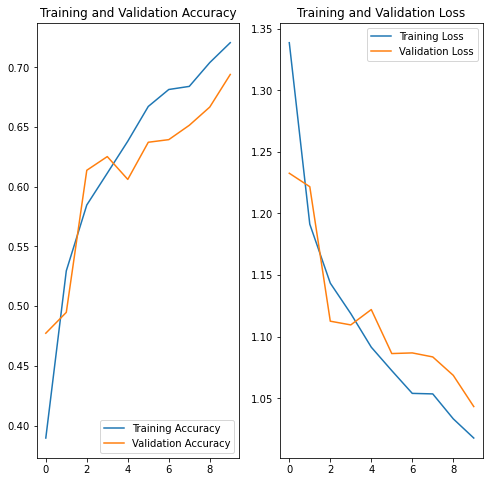

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Data Augmentation 

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_aug = tf.keras.Sequential([
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip("horizontal")
    
],name = "data_augmentation_layer")
#preprocessing.RandomContrast(0.2)

# Early Stop

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 6,
                                             min_delta = 0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",factor = 0.2,
                                                patience = 4,min_lr = 1e-7)


# Model

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
model = tf.keras.applications.InceptionV3(include_top = False,input_shape=(299,299,3))
#model.trainable = False

In [ ]:
inputs = layers.Input(shape = (224,224,3),name = "input_layer")
#x = data_aug(inputs)
#x = model(x)
#x = layers.GlobalAvgPool2D(name = "pooling_layer")(x)
# parameter used to specify the size of the output generated from the layer.
#x = layers.Dense(32,activation = "relu",kernel_initializer = tf.keras.initializers.he_normal())(x)
#x = layers.Dense(10)(x)
#outputs = layers.Activation("softmax",dtype = tf.float32)(x)
#model = tf.keras.Model(inputs,outputs)
#model.summary()

In [ ]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.SGD(momentum = 0.9),metrics = ["accuracy"])

In [ ]:
history_1 = model.fit(train_data,epochs =20 , validation_data = val_data, callbacks = [early_stop,reduce_lr])


In [ ]:
print("Testing Accuracy",model.evaluate(test_data)) 